# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [11]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [12]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class TreeNode_BinarySearchTree():
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class TreeNode_BalancedSearchTree():
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.top = None
        self.color = "red"

# Helper Function to calculate false postives in bloom filter
def falsePositiveRate(self, test_dataset):
    false_positives = 0
    for element in test_dataset:
        if self.searchElement(element):
            false_positives += 1
    return false_positives / len(test_dataset)

# Helper Function to insert words stored in given words_list to a given data structure, during real data test.
def test_insert(algorithms, words_list):
    for word in words_list:
        algorithms.insertElement(word)

# Helper Function to search words stored in search_words_list in a given data structure, during real data test.
def test_search(algorithms):
    for word in search_words_list:
        algorithms.searchElement(word)

# Helper Function to insert words stored in given words_list to prepare the given data structure for testing the insert time when the data structure already have an certain amount of data, during Synthetic Test.
def prepare_test_insert(algorithms, words_list, limit):
    for word_index in range(limit):
        algorithms.insertElement(words_list[word_index])

# Helper Function to insert the last word stored in words_list in a given data structure, during Synthetic Test.
def test_insert_Synthetic_Test(algorithms, words_list, index_word_test):
    algorithms.insertElement(words_list[index_word_test])

# Helper Function to search words stored in words_list in a given data structure, during Synthetic Test.
def test_total_search_Synthetic_Test(algorithms, words_list):
    for word in words_list:
        algorithms.searchElement(word)

# Helper functions to get the worst case by searching one by one and take the longest time, during Synthetic Test.
# for sequential search
def test_search_one_element_for_ss_Synthetic_Test(words_list):
    longest_time_taken =0
    for word in words_list:
        time_taken = timeit.timeit(lambda: ss.searchElement(word), number = 1, globals = globals())
        if time_taken > longest_time_taken:
            longest_time_taken = time_taken
    return longest_time_taken
# for binary search tree
def test_search_one_element_for_bst_Synthetic_Test(words_list):
    longest_time_taken =0
    for word in words_list:
        time_taken = timeit.timeit(lambda: bst.searchElement(word), number = 1, globals = globals())
        if time_taken > longest_time_taken:
            longest_time_taken = time_taken
    return longest_time_taken
# for balanced search tree
def test_search_one_element_for_bal_Synthetic_Test(words_list):
    longest_time_taken =0
    for word in words_list:
        time_taken = timeit.timeit(lambda: bal.searchElement(word), number = 1, globals = globals())
        if time_taken > longest_time_taken:
            longest_time_taken = time_taken
    return longest_time_taken
# for bloom filter
def test_search_one_element_for_bf_Synthetic_Test(words_list):
    longest_time_taken =0
    for word in words_list:
        time_taken = timeit.timeit(lambda: bf.searchElement(word), number = 1, globals = globals())
        if time_taken > longest_time_taken:
            longest_time_taken = time_taken
    return longest_time_taken

Use the cell below to implement the requested API by means of **sequential search**.

In [13]:
class SequentialSearchSet(AbstractSet):
    def __init__(self):
        # ADD YOUR CODE HERE
        self.data = []        

    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        if element in self.data:
            return inserted
        else:
            self.data.append(element)
            inserted = True
            return inserted

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for i in range (len(self.data)):
            if self.data[i] == element:
                found = True
                break
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [14]:
class BinarySearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        new_node = TreeNode_BinarySearchTree(element)
        if self.root is None:
            self.root = new_node
            inserted = True
        else:
            current = self.root
            while True:
                if element < current.value:
                    # check the left when the element want to insert is smaller
                    if current.left is None:
                        current.left = new_node
                        inserted = True
                        break
                    else:
                        # move to the left
                        current = current.left
                elif element > current.value:
                    # check the right when the element want to insert is smaller
                    if current.right is None:
                        current.right = new_node
                        inserted = True
                        break
                    else:
                        # move to the right
                        current = current.right
                else:
                    # element is already in the tree
                    break
        return inserted
    
    def searchElement(self, element):
        found = False
        # ADD YOUR CODE HERE
        current = self.root
        while current is not None:
            if element == current.value:
                found = True
                break
            elif element < current.value:
                # move to the left if the element want to find is smaller
                current = current.left
            else:
                # move to the right if the element want to find is larger
                current = current.right
        return found

Use the cell below to implement the requested API by means of **balanced search tree**.

In [15]:
class BalancedSearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = None       
    
    def insertElement(self, element):
        inserted = False
        if self.root is None:
            self.root = TreeNode_BalancedSearchTree(element)
            inserted = True
            return inserted
        else:
            currentNode = self.root
            while True:
                if currentNode.value == element:
                    return inserted
                elif currentNode.value > element:
                    if currentNode.left is None:
                        currentNode.left = TreeNode_BalancedSearchTree(element)
                        currentNode.left.top = currentNode
                        inserted = True
                        break
                    else:
                        currentNode = currentNode.left
                else:
                    if currentNode.right is None:
                        currentNode.right = TreeNode_BalancedSearchTree(element)
                        currentNode.right.top = currentNode
                        inserted = True
                        break
                    else:
                        currentNode = currentNode.right
            if inserted:
                while currentNode is not None:
                    if (currentNode.left is None or currentNode.left.color == "black") and currentNode.right is not None and currentNode.right.color == "red":
                        # left rotation 
                        tampNode= currentNode.right
                        if tampNode.left is not None:
                            currentNode.right = tampNode.left
                            tampNode.left.top = currentNode
                        else:
                            currentNode.right = None
                        if currentNode.top is not None:
                            topNode = currentNode.top
                            if topNode.left == currentNode:
                                topNode.left = tampNode
                            else:
                                topNode.right = tampNode
                        elif currentNode == self.root:
                            self.root = tampNode
                        tampNode.left = currentNode
                        tampNode.top = currentNode.top
                        currentNode.top = tampNode
                        tampNode.color = currentNode.color
                        currentNode.color = "red"
                    if currentNode.top is not None and currentNode.color == "red" and currentNode.left is not None and currentNode.left.color == "red":
                        # right rotation
                        rightNode = currentNode.top
                        currentNode.color = rightNode.color
                        rightNode.color = "red"
                        if rightNode.top is not None:
                            topNode = rightNode.top
                            if topNode.left == rightNode:
                                topNode.left = currentNode
                            else:
                                topNode.right = currentNode
                        if rightNode == self.root:
                            self.root = currentNode
                        rightNode.left = currentNode.right
                        if currentNode.right is not None:
                            currentNode.right.top = rightNode
                        currentNode.right = rightNode
                        currentNode.top = rightNode.top
                        rightNode.top = currentNode
                    if currentNode.left is not None and currentNode.left.color == "red" and currentNode.right is not None and currentNode.right.color == "red":
                        # shift color
                        currentNode.left.color = "black"
                        currentNode.right.color = "black"
                        currentNode.color = "red"
                    currentNode = currentNode.top
            return inserted

    def searchElement(self, element):     
        found = False
        currentNode = self.root
        while currentNode is not None:
            if currentNode.value == element:
                found = True
                return found
            elif currentNode.value > element:
                currentNode = currentNode.left
            else:
                currentNode = currentNode.right
        return found 

Use the cell below to implement the requested API by means of **bloom filter**.

In [86]:
import random

class BloomFilterSet(AbstractSet):
    
    def __init__(self):
        self.size = 2384342
        self.hash_count = 1
        self.bit_array = [False] * self.size
        self.hash_seeds = self.generate_hash_seeds()

    def generate_hash_seeds(self):
        # Generate a set of random hash seeds using a fixed seed value [1]
        # This ensures that the same set of seeds is used every time
        hash_seeds = []
        rng = random.Random(42)
        for i in range(self.hash_count):
            hash_seeds.append(rng.randint(0, 2**32-1))
        return tuple(hash_seeds)


    def hash_string(self, string, seed):
        # Compute a hash value for the given string using the given seed
        # This implementation uses the FNV-1a hash function [2][3]
        fnv_offset_basis = 2166136261
        fnv_prime = 16777619
        hash_value = fnv_offset_basis ^ seed
        for char in string:
            hash_value = (hash_value ^ ord(char)) * fnv_prime
        return hash_value

    def get_hashes(self, element):
        # Generate a set of hash values for the given element
        # using the precomputed set of hash seeds [4]
        hashes = []
        for seed in self.hash_seeds:
            hash_value = self.hash_string(element, seed)
            hash_value = hash_value % self.size
            hashes.append(hash_value)
        return hashes

    def insertElement(self, element):
        inserted = False
        for hash_value in self.get_hashes(element):
            # Set the corresponding bit in the bit array to True
            self.bit_array[hash_value] = True
        return inserted

    def searchElement(self, element):
        found = True
        for hash_value in self.get_hashes(element):
        # Check if the corresponding bit in the bit array is True
            if not self.bit_array[hash_value]:
                found = False
                return found
        return found

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [17]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        pass           
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        # loop size times
        for i in range(size):
            # generate a random string of random length between 1 and 10
            rand_len_str = random.randint(1, 10)
            rand_str = ''.join(random.choices(string.ascii_letters, k = rand_len_str))
            # add the string to the set
            data.append(rand_str)        
        return data

Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [87]:
import timeit

# The following search_words_list stores words want to be searched during the experiment.

search_words_list = []
with open(r"testfiles\\" + "test-search.txt", "r", encoding = "utf-8") as search_file:
    search_words_list = search_file.read().split()

# The following test<index>_words_list stores words want to be inserted during the experiment.

file_list = ["test1-mobydick.txt", "test2-warpeace.txt", "test3-dickens.txt"]
test1_words_list = []
test2_words_list = []
test3_words_list = []
for file in file_list:
    with open(r"testfiles\\" + file, "r", encoding="utf-8") as current_file:
        if file == file_list[0]:
            test1_words_list = current_file.read().split()
        elif file == file_list[1]:
            test2_words_list = current_file.read().split()
        else:
            test3_words_list = current_file.read().split()

# The following lists store the results of insert and search time of different files.
# ss is SequentialSearch
# bst is BinarySearchTree
# bal is BalancedSearchTree
# bf is BloomFilter
# [0] is the data for file "test1-mobydick.txt"
# [1] is the data for file "test2-warpeace.txt"
# [2] is the data for file "test3-dickens.txt"

ss_insert_time_data = []
ss_search_time_data = []

bst_insert_time_data = []
bst_search_time_data = []

bal_insert_time_data = []
bal_search_time_data = []

bf = BloomFilterSet()
bf_insert_time_data = []
bf_search_time_data = []

# test1 ===================================================================================================#
print("test1:")
# test1 Sequential Search =====================#
ss1 = SequentialSearchSet()
ss1_insert_time_test1 = timeit.timeit('test_insert(ss1, test1_words_list)', number = 1, globals = globals())
ss_insert_time_data.append(ss1_insert_time_test1)
print(f"Sequential Search total insert time: {ss1_insert_time_test1} seconds")
ss1_search_time_test1 = timeit.timeit('test_search(ss1)', number = 1, globals = globals())
ss_search_time_data.append(ss1_search_time_test1)
print(f"Sequential Search total search time: {ss1_search_time_test1} seconds")
# test1 Binary Search Tree ====================#
bst1 = BinarySearchTreeSet()
bst1_insert_time_test1 = timeit.timeit('test_insert(bst1, test1_words_list)', number = 1, globals = globals())
bst_insert_time_data.append(bst1_insert_time_test1)
print(f"Binary Search Tree total insert time: {bst1_insert_time_test1} seconds")
bst1_search_time_test1 = timeit.timeit('test_search(bst1)', number = 1, globals = globals())
bst_search_time_data.append(bst1_search_time_test1)
print(f"Binary Search Tree total search time: {bst1_search_time_test1} seconds")
# test1 Balanced Search Tree ==================#
bal1 = BalancedSearchTreeSet()
bal1_insert_time_test1 = timeit.timeit('test_insert(bal1, test1_words_list)', number = 1, globals = globals())
bal_insert_time_data.append(bal1_insert_time_test1)
print(f"Balanced Search Tree total insert time: {bal1_insert_time_test1} seconds")
bal1_search_time_test1 = timeit.timeit('test_search(bal1)', number = 1, globals = globals())
bal_search_time_data.append(bal1_search_time_test1)
print(f"Balanced Search Tree total search time: {bal1_search_time_test1} seconds")
# test1 Bloom Filter ==========================#
bf1 = BloomFilterSet()
bf1_insert_time_test1 = timeit.timeit('test_insert(bf1, test1_words_list)', number = 1, globals = globals())
bf_insert_time_data.append(bf1_insert_time_test1)
print(f"Bloom Filter total insert time: {bf1_insert_time_test1} seconds")
bf1_search_time_test1 = timeit.timeit('test_search(bf1)', number = 1, globals = globals())
bf_search_time_data.append(bf1_search_time_test1)
print(f"Bloom Filter total search time: {bf1_search_time_test1} seconds")
print("\n")

# test2 ===================================================================================================#
print("test2:")
# test2 Sequential Search =====================#
ss2 = SequentialSearchSet()
ss2_insert_time_test2 = timeit.timeit('test_insert(ss2, test2_words_list)', number = 1, globals = globals())
ss_insert_time_data.append(ss2_insert_time_test2)
print(f"Sequential Search total insert time: {ss2_insert_time_test2} seconds")
ss2_search_time_test2 = timeit.timeit('test_search(ss2)', number = 1, globals = globals())
ss_search_time_data.append(ss2_search_time_test2)
print(f"Sequential Search total search time: {ss2_search_time_test2} seconds")
# test2 Binary Search Tree ====================#
bst2 = BinarySearchTreeSet()
bst2_insert_time_test2 = timeit.timeit('test_insert(bst2, test2_words_list)', number = 1, globals = globals())
bst_insert_time_data.append(bst2_insert_time_test2)
print(f"Binary Search Tree total insert time: {bst2_insert_time_test2} seconds")
bst2_search_time_test2 = timeit.timeit('test_search(bst2)', number = 1, globals = globals())
bst_search_time_data.append(bst2_search_time_test2)
print(f"Binary Search Tree total search time: {bst2_search_time_test2} seconds")
# test2 Balanced Search Tree ==================#
bal2 = BalancedSearchTreeSet()
bal2_insert_time_test2 = timeit.timeit('test_insert(bal2, test2_words_list)', number = 1, globals = globals())
bal_insert_time_data.append(bal2_insert_time_test2)
print(f"Balanced Search Tree total insert time: {bal2_insert_time_test2} seconds")
bal2_search_time_test2 = timeit.timeit('test_search(bal2)', number = 1, globals = globals())
bal_search_time_data.append(bal2_search_time_test2)
print(f"Balanced Search Tree total search time: {bal2_search_time_test2} seconds")
# test2 Bloom Filter ==========================#
bf2 = BloomFilterSet()
bf2_insert_time_test2 = timeit.timeit('test_insert(bf2, test2_words_list)', number = 1, globals = globals())
bf_insert_time_data.append(bf2_insert_time_test2)
print(f"Bloom Filter total insert time: {bf2_insert_time_test2} seconds")
bf2_search_time_test2 = timeit.timeit('test_search(bf2)', number = 1, globals = globals())
bf_search_time_data.append(bf2_search_time_test2)
print(f"Bloom Filter total search time: {bf2_search_time_test2} seconds")
print("\n")

# test3 ===================================================================================================#
print("test3:")
# test3 Sequential Search =====================#
ss3 = SequentialSearchSet()
ss3_insert_time_test3 = timeit.timeit('test_insert(ss3, test3_words_list)', number = 1, globals = globals())
ss_insert_time_data.append(ss3_insert_time_test3)
print(f"Sequential Search total insert time: {ss3_insert_time_test3} seconds")
ss3_search_time_test3 = timeit.timeit('test_search(ss3)', number = 1, globals = globals())
ss_search_time_data.append(ss3_search_time_test3)
print(f"Sequential Search total search time: {ss3_search_time_test3} seconds")
# test3 Binary Search Tree ====================#
bst3 = BinarySearchTreeSet()
bst3_insert_time_test3 = timeit.timeit('test_insert(bst3, test3_words_list)', number = 1, globals = globals())
bst_insert_time_data.append(bst3_insert_time_test3)
print(f"Binary Search Tree total insert time: {bst3_insert_time_test3} seconds")
bst3_search_time_test3 = timeit.timeit('test_search(bst3)', number = 1, globals = globals())
bst_search_time_data.append(bst3_search_time_test3)
print(f"Binary Search Tree total search time: {bst3_search_time_test3} seconds")
# test3 Balanced Search Tree ==================#
bal3 = BalancedSearchTreeSet()
bal3_insert_time_test3 = timeit.timeit('test_insert(bal3, test3_words_list)', number = 1, globals = globals())
bal_insert_time_data.append(bal3_insert_time_test3)
print(f"Balanced Search Tree total insert time: {bal3_insert_time_test3} seconds")
bal3_search_time_test3 = timeit.timeit('test_search(bal3)', number = 1, globals = globals())
bal_search_time_data.append(bal3_search_time_test3)
print(f"Balanced Search Tree total search time: {bal3_search_time_test3} seconds")
# test3 Bloom Filter ==========================#
bf3 = BloomFilterSet()
bf3_insert_time_test3 = timeit.timeit('test_insert(bf3, test3_words_list)', number = 1, globals = globals())
bf_insert_time_data.append(bf3_insert_time_test3)
print(f"Bloom Filter total insert time: {bf3_insert_time_test3} seconds")
bf3_search_time_test3 = timeit.timeit('test_search(bf3)', number = 1, globals = globals())
bf_search_time_data.append(bf3_search_time_test3)
print(f"Bloom Filter total search time: {bf3_search_time_test3} seconds")
print("Real data test end.")

test1:
Sequential Search total insert time: 4.386636299999736 seconds
Sequential Search total search time: 0.11808639999981096 seconds
Binary Search Tree total insert time: 0.2978888999996343 seconds
Binary Search Tree total search time: 0.0008953000005931244 seconds
Balanced Search Tree total insert time: 0.33828540000013163 seconds
Balanced Search Tree total search time: 0.0006997999998930027 seconds
Bloom Filter total insert time: 0.18089280000003782 seconds
Bloom Filter total search time: 0.0005512999996426515 seconds


test2:
Sequential Search total insert time: 8.913232100000641 seconds
Sequential Search total search time: 0.10453069999948639 seconds
Binary Search Tree total insert time: 0.7854818000005253 seconds
Binary Search Tree total search time: 0.0008821000001262291 seconds
Balanced Search Tree total insert time: 0.7511187000000064 seconds
Balanced Search Tree total search time: 0.0007383000001937035 seconds
Bloom Filter total insert time: 0.4875248999996984 seconds
Bloom 

In [88]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA

SyntheticTest = TestDataGenerator()

# The following lists are used to store results, from data size 0 to given max_size.

ss_insert_time_data_for_synthetic = []
ss_average_search_time_data_for_synthetic = []
ss_worst_search_time_data_for_synthetic = []
bst_insert_time_data_for_synthetic = []
bst_average_search_time_data_for_synthetic = []
bst_worst_search_time_data_for_synthetic = []
bal_insert_time_data_for_synthetic = []
bal_average_search_time_data_for_synthetic = []
bal_worst_search_time_data_for_synthetic = []
bf_insert_time_data_for_synthetic = []
bf_average_search_time_data_for_synthetic = []
bf_worst_search_time_data_for_synthetic = []

# Test
max_size = 1000
for num_data in range(1, max_size + 1):
    data = SyntheticTest.generateData(num_data)
    # data.sort()
    ss = SequentialSearchSet()
    bst = BinarySearchTreeSet()
    bal = BalancedSearchTreeSet()
    bf = BloomFilterSet()
    # print(num_data)
    if num_data == 1:
        # Sequential search
        ss_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(ss, data, num_data - 1)', number = 1, globals = globals())
        ss_insert_time_data_for_synthetic.append(ss_insert_time_with_this_data_size)
        # print(f"Sequential Search insert time: {ss_insert_time_with_this_data_size} seconds")
        ss_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(ss, data)', number = 1, globals = globals())
        ss_average_search_time_data_for_synthetic.append(ss_search_time_with_this_data_size)
        ss_worst_search_time_data_for_synthetic.append(ss_search_time_with_this_data_size)
        # Binary search tree
        bst_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(bst, data, num_data - 1)', number = 1, globals = globals())
        bst_insert_time_data_for_synthetic.append(bst_insert_time_with_this_data_size)
        bst_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(bst, data)', number = 1, globals = globals())
        bst_average_search_time_data_for_synthetic.append(bst_search_time_with_this_data_size)
        bst_worst_search_time_data_for_synthetic.append(bst_search_time_with_this_data_size)
        # Balanced search tree
        bal_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(bal, data, num_data - 1)', number = 1, globals = globals())
        bal_insert_time_data_for_synthetic.append(bal_insert_time_with_this_data_size)
        bal_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(bal, data)', number = 1, globals = globals())
        bal_average_search_time_data_for_synthetic.append(bal_search_time_with_this_data_size)
        bal_worst_search_time_data_for_synthetic.append(bal_search_time_with_this_data_size)
        # Bloom filter
        bf_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(bf, data, num_data - 1)', number = 1, globals = globals())
        bf_insert_time_data_for_synthetic.append(bf_insert_time_with_this_data_size)
        bf_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(bf, data)', number = 1, globals = globals())
        bf_average_search_time_data_for_synthetic.append(bf_search_time_with_this_data_size)
        bf_worst_search_time_data_for_synthetic.append(bf_search_time_with_this_data_size)
    else:
        # Sequential search
        prepare_test_insert(ss, data, num_data - 1)
        ss_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(ss, data, num_data - 1)', number = 1, globals = globals())
        ss_insert_time_data_for_synthetic.append(ss_insert_time_with_this_data_size)
        # print(f"Sequential Search insert time: {ss_insert_time_with_this_data_size} seconds")
        ss_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(ss, data)', number = 1, globals = globals())
        ss_average_search_time_with_this_data_size = ss_search_time_with_this_data_size / num_data
        ss_average_search_time_data_for_synthetic.append(ss_average_search_time_with_this_data_size)
        ss_worst_search_time_data_for_synthetic.append(test_search_one_element_for_ss_Synthetic_Test(data))
        # Binary search tree
        prepare_test_insert(bst, data, num_data - 1)
        bst_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(bst, data, num_data - 1)', number = 1, globals = globals())
        bst_insert_time_data_for_synthetic.append(bst_insert_time_with_this_data_size)
        bst_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(bst, data)', number = 1, globals = globals())
        bst_average_search_time_with_this_data_size = bst_search_time_with_this_data_size / num_data
        bst_average_search_time_data_for_synthetic.append(bst_average_search_time_with_this_data_size)
        bst_worst_search_time_data_for_synthetic.append(test_search_one_element_for_bst_Synthetic_Test(data))
        # Balanced search tree
        prepare_test_insert(bal, data, num_data - 1)
        bal_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(bal, data, num_data - 1)', number = 1, globals = globals())
        bal_insert_time_data_for_synthetic.append(bal_insert_time_with_this_data_size)
        bal_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(bal, data)', number = 1, globals = globals())
        bal_average_search_time_with_this_data_size = bal_search_time_with_this_data_size / num_data
        bal_average_search_time_data_for_synthetic.append(bal_average_search_time_with_this_data_size)
        bal_worst_search_time_data_for_synthetic.append(test_search_one_element_for_bal_Synthetic_Test(data))
        # Bloom filter
        prepare_test_insert(bf, data, num_data - 1)
        bf_insert_time_with_this_data_size = timeit.timeit('test_insert_Synthetic_Test(bf, data, num_data - 1)', number = 1, globals = globals())
        bf_insert_time_data_for_synthetic.append(bf_insert_time_with_this_data_size)
        bf_search_time_with_this_data_size = timeit.timeit('test_total_search_Synthetic_Test(bf, data)', number = 1, globals = globals())
        bf_average_search_time_with_this_data_size = bf_search_time_with_this_data_size / num_data
        bf_average_search_time_data_for_synthetic.append(bf_average_search_time_with_this_data_size)
        bf_worst_search_time_data_for_synthetic.append(test_search_one_element_for_bf_Synthetic_Test( data))

# #-------------------------- Accuracy test for bloom filter-----------------------#

# # Data for the bloom filter
# BFTest = TestDataGenerator()
# BFdata = BFTest.generateData(1000)

# bf2 = BloomFilterSet()

# insert 500 integers in the Bloom Filter
# for data in BFdata:
#     bf2.insertElement(str(BFdata))

# # Test the Bloom Filter with 1000 integers
# false_positives = 0
# for data in BFdata:
#     if data < '500':
#         if not bf.searchElement(str(data)):
#             pass
#     else:
#         if bf.searchElement(str(data)):
#             false_positives += 1

In [85]:
import math

# Equations used to calculate the size and hash_count values based on the number
# of elements and the desired fasle positive rate [1]
def calculate_bloom_filter_params(num_elements, false_pos_rate):
    size = - (num_elements * math.log(false_pos_rate)) / (math.log(2)**2)
    hash_count = (size / num_elements) * math.log(2)
    return int(size), int(hash_count)

calculate_bloom_filter_params(1652700, 0.5)

(2384342, 1)

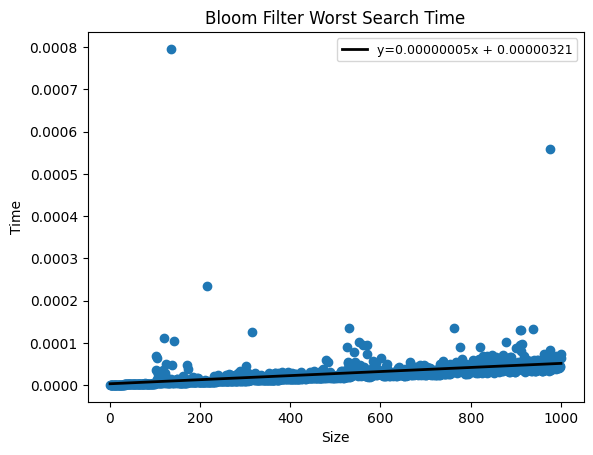

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1, 1001)
#-------------------------- Sequential Search -----------------------#
# Insert
# plt.title("Sequential Search Insert Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, ss_insert_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, ss_insert_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

# Average Search
# plt.title("Sequential Search Average Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, ss_average_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, ss_average_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

# Worst Search
# plt.title("Sequential Search Worst Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, ss_worst_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, ss_worst_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

#-------------------------- Binary Search Tree -----------------------#
# Insert
# plt.title("Binary Search Tree Insert Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bst_insert_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, bst_insert_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

# Average Search
# plt.title("Binary Search Tree Average Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bst_average_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(np.log(x), bst_average_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * np.log(x), color = "k", lw = 2, label = 'y={:.8f}log(x) + {:.8f}'.format(slope, intercept))

# Worst Search
# plt.title("Binary Search Tree Worst Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bst_worst_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, bst_worst_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

#-------------------------- Balanced Search Tree -----------------------#
# Insert
# plt.title("Balanced Search Tree Insert Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bal_insert_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, bal_insert_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

# Average Search
# plt.title("Balanced Search Tree Average Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bal_average_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(np.log(x), bal_average_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * np.log(x), color = "k", lw = 2, label = 'y={:.8f}log(x) + {:.8f}'.format(slope, intercept))

# Worst Search
# plt.title("Balanced Search Tree Worst Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bal_worst_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, bal_worst_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

#-------------------------- Bloom Filter -----------------------#
# Insert
# plt.title("Bloom Filter Insert Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bf_insert_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, bf_insert_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

# Average Search
# plt.title("Bloom Filter Average Search Time")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.scatter(x, bf_average_search_time_data_for_synthetic)
# slope , intercept = np.polyfit(x, bf_average_search_time_data_for_synthetic, deg = 1)
# plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

# Worst Search
plt.title("Bloom Filter Worst Search Time")
plt.xlabel("Size")
plt.ylabel("Time")
plt.scatter(x, ss_worst_search_time_data_for_synthetic)
slope , intercept = np.polyfit(x, ss_worst_search_time_data_for_synthetic, deg = 1)
plt.plot(x, intercept + slope * x, color = "k", lw = 2, label = 'y={:.8f}x + {:.8f}'.format(slope, intercept))

plt.legend(fontsize = 9)
plt.show()

References:

[1] https://en.wikipedia.org/wiki/Bloom_filter
[2] http://www.isthe.com/chongo/tech/comp/fnv/index.html
[3] https://en.wikipedia.org/wiki/Fowler%E2%80%93Noll%E2%80%93Vo_hash_function
[4] http://www.isthe.com/chongo/tech/comp/fnv/
[5]  